In [43]:
from sklearn.datasets import fetch_openml
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
X = X.values.reshape(-1, 28, 28, 1)  # Reshape to (n_samples, 28, 28, 1) for CNN
y = y.astype(np.int)  # Convert labels to integers

print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Data shape: (70000, 28, 28, 1)
Labels shape: (70000,)


/var/folders/m7/kjlvnd0d4rz0kv7l72gnglgc0000gn/T/ipykernel_3656/483005223.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)  # Convert labels to integers


In [44]:
X = X / 255.0  # Normalize the data


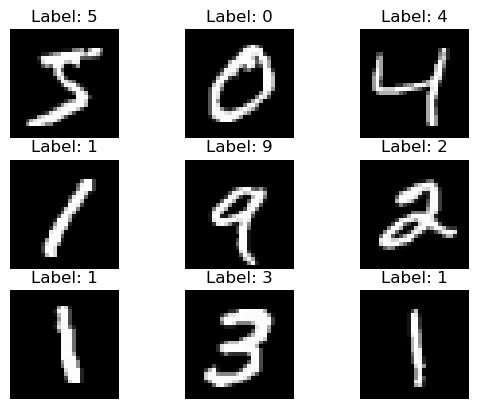

In [45]:
import matplotlib.pyplot as plt

# Visualize the first few images
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()


In [46]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, 10)  # Convert labels to one-hot encoding


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [50]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Input

# Use Input layer explicitly to avoid warning
model = Sequential([
    Input(shape=(28, 28, 1)),  # Define input shape here
    Conv2D(32, (3, 3)),
    Flatten(),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1667, random_state=42)

# Train the CNN model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
912/912 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8254 - loss: 0.5467 - val_accuracy: 0.9781 - val_loss: 0.0695
Epoch 2/10
912/912 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9694 - loss: 0.1033 - val_accuracy: 0.9833 - val_loss: 0.0525
Epoch 3/10
912/912 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9785 - loss: 0.0706 - val_accuracy: 0.9876 - val_loss: 0.0414
Epoch 4/10
912/912 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9829 - loss: 0.0557 - val_accuracy: 0.9889 - val_loss: 0.0357
Epoch 5/10
912/912 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9863 - loss: 0.0469 - val_accuracy: 0.9877 - val_loss: 0.0404
Epoch 6/10
912/912 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9882 - loss: 0.0396 - val_accuracy: 0.9893 - val_loss: 0.0346
Epoch 7/10
912/912 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9898 - loss: 0.0335 - val_accuracy: 0.9877 - val_loss: 0.0396
Epoch 8/10
912/912 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9910 - loss: 0.0288 - v

In [54]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9917 - loss: 0.0289
Test accuracy: 0.9922


In [55]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)


365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1135    0    0    0    0    0    3    1    1    0]
 [   0 1332    1    0    0    0    0    3    0    0]
 [   0    1 1131    2    0    0    0    2    3    0]
 [   0    0    5 1182    0    2    0    1    0    1]
 [   0    0    0    0 1089    0    0    1    0    5]
 [   2    0    0    5    0 1049    2    0    2    0]
 [   1    0    0    0    3    1 1132    0    2    1]
 [   0    1    3    1    2    0    0 1226    0    2]
 [   0    0    3    2    0    4    1    1 1120    5]
 [   3    0    0    2    4    1    0    2    3 1182]]


In [57]:
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Create function to build model (used for Grid Search)
def build_model(optimizer='adam'):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


print(model.summary())


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

None


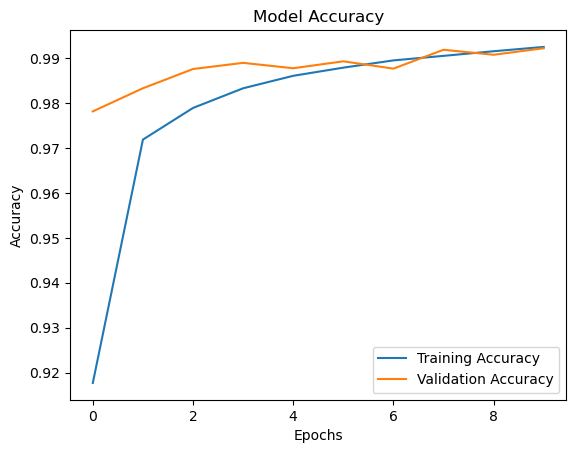

In [58]:
# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
